<a href="https://colab.research.google.com/github/Saakshi-Singh/Optidiet/blob/main/McDonaldCasestudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**A**.**4** **Step** **4**: **Exploring** **Data**

In [15]:
import pandas as pd

# Assuming 'mcdonalds.csv' is the dataset equivalent to what would be loaded in R
mcdonalds = pd.read_csv("/content/mcdonalds.csv")


# To get the column names, similar to names(mcdonalds) in R
column_names = mcdonalds.columns
print(column_names)

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


In [16]:

dimensions = mcdonalds.shape
print(dimensions)

(1453, 15)


In [17]:

print(mcdonalds.head(3))

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [18]:
import pandas as pd
import numpy as np

# Assuming 'mcdonalds' is a pandas DataFrame
# Select the first 11 columns
MD_x = mcdonalds.iloc[:, 0:11].values

# Convert "Yes" to 1, and everything else to 0
MD_x = (MD_x == "Yes").astype(int)

# Calculate the column means and round to 2 decimal places
col_means = np.round(MD_x.mean(axis=0), 2)

print(col_means)

[0.55 0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]


In [19]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA()
MD_pca = pca.fit(MD_x)

# Summary of PCA
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# Print explained variance for each component
print("Explained Variance Ratio:", explained_variance)

# Print cumulative explained variance
print("Cumulative Explained Variance:", cumulative_variance)

Explained Variance Ratio: [0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]
Cumulative Explained Variance: [0.29944723 0.49224445 0.6252898  0.70838558 0.7678661  0.81816566
 0.86201476 0.90156255 0.93832345 0.97067674 1.        ]


In [20]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

# Assuming MD_x is your dataset
pca = PCA()
MD_pca = pca.fit(MD_x)

# Function to print PCA results with controlled precision
def print_pca_results(pca_result, digits=1):
    np.set_printoptions(precision=digits, suppress=True)

    # Printing the explained variance ratio
    explained_variance_ratio = np.round(pca_result.explained_variance_ratio_, digits)
    print("Explained Variance Ratio:", explained_variance_ratio)

    # Printing the PCA components
    components = np.round(pca_result.components_, digits)
    print("PCA Components:")
    print(components)

# Apply the function to your PCA result
print_pca_results(MD_pca, digits=1)

Explained Variance Ratio: [0.3 0.2 0.1 0.1 0.1 0.1 0.  0.  0.  0.  0. ]
PCA Components:
[[-0.5 -0.2 -0.   0.1  0.3 -0.1 -0.3 -0.5  0.3 -0.2  0.4]
 [ 0.4  0.   0.  -0.  -0.1 -0.1 -0.6  0.3  0.6  0.1 -0.1]
 [-0.3 -0.1 -0.  -0.3 -0.8 -0.1 -0.1 -0.3  0.   0.2 -0.1]
 [ 0.1 -0.1  0.2 -0.4  0.3 -0.1  0.1 -0.   0.1  0.8  0.4]
 [-0.3  0.3  0.1 -0.1  0.4  0.1 -0.1 -0.2 -0.   0.3 -0.7]
 [ 0.2 -0.3 -0.4 -0.4  0.2 -0.6 -0.1 -0.1 -0.3 -0.2 -0.2]
 [-0.3 -0.1  0.7 -0.4  0.  -0.1 -0.   0.4 -0.1 -0.3 -0. ]
 [ 0.  -0.1  0.4  0.6 -0.1 -0.6  0.1 -0.1  0.   0.2 -0.2]
 [ 0.6 -0.   0.4 -0.2 -0.   0.2  0.1 -0.6  0.1 -0.2 -0.1]
 [-0.1 -0.7 -0.1 -0.   0.   0.2  0.4  0.1  0.5 -0.  -0.3]
 [ 0.  -0.5  0.1  0.3  0.   0.3 -0.5  0.  -0.5  0.2 -0. ]]


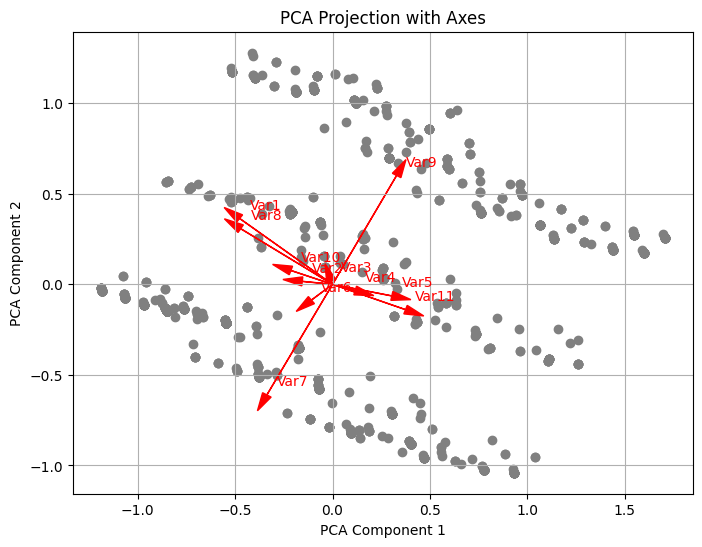

In [21]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming MD_x is your dataset
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

# Plotting the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey')

# Adding axis projections (equivalent to projAxes)
for i, (comp1, comp2) in enumerate(zip(pca.components_[0], pca.components_[1])):
    plt.arrow(0, 0, comp1, comp2, color='red', head_width=0.05, head_length=0.1)
    plt.text(comp1 + 0.05, comp2 + 0.05, f"Var{i+1}", color='red')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Projection with Axes')
plt.grid(True)
plt.show()

**Step** **5** **Extracting** **segments**

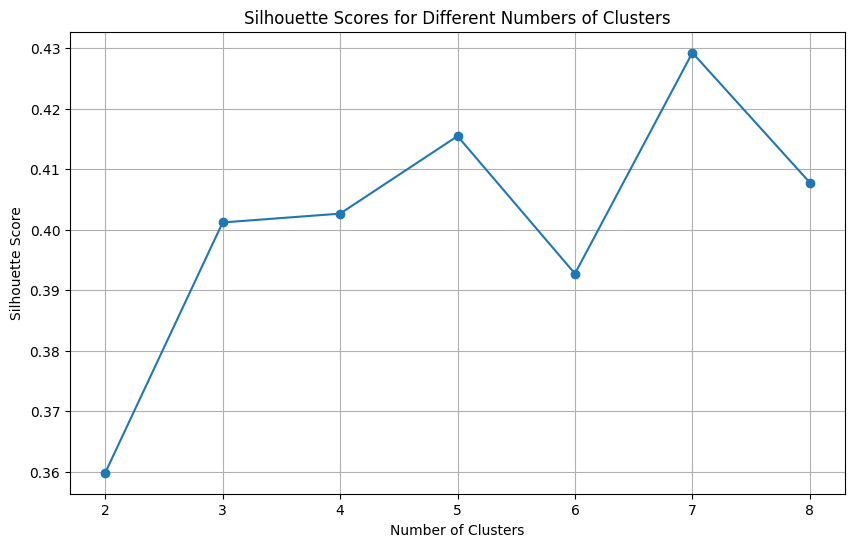

   Feature1  Feature2  Cluster
0  0.864982  0.707821        2
1  0.710271  0.327429        1
2  0.170632  0.425294        4
3  0.855083  0.704768        2
4  0.019857  0.159077        6


In [22]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Example MD_x DataFrame (replace with your actual data)
MD_x = pd.DataFrame({
    'Feature1': np.random.rand(100),
    'Feature2': np.random.rand(100),
    # Include other features if needed
})

# Set random seed for reproducibility
np.random.seed(1234)

# Define the range of clusters to evaluate
cluster_range = range(2, 9)  # From 2 to 8 clusters

# Initialize lists to store results
kmeans_models = {}
silhouette_scores = []

# Perform k-means clustering for each number of clusters in range
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    kmeans_models[k] = kmeans
    # Calculate silhouette score
    score = silhouette_score(MD_x, kmeans.labels_)
    silhouette_scores.append(score)

# Plot silhouette scores to determine the optimal number of clusters
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.grid(True)
plt.show()

# Relabel clusters (Python equivalent depends on your specific needs)
# Here, we assume relabeling means mapping clusters to a standard order
# Get the labels of the best model (e.g., with the highest silhouette score)
best_k = cluster_range[np.argmax(silhouette_scores)]
best_kmeans = kmeans_models[best_k]

# Create a DataFrame with the cluster labels
MD_x['Cluster'] = best_kmeans.labels_

# Optionally, relabel clusters if needed (e.g., assign new cluster labels)
# This is a placeholder for relabeling logic
relabel_mapping = {i: i for i in range(best_k)}  # Identity mapping as an example
MD_x['Cluster'] = MD_x['Cluster'].map(relabel_mapping)

# Display the cluster labels
print(MD_x.head())

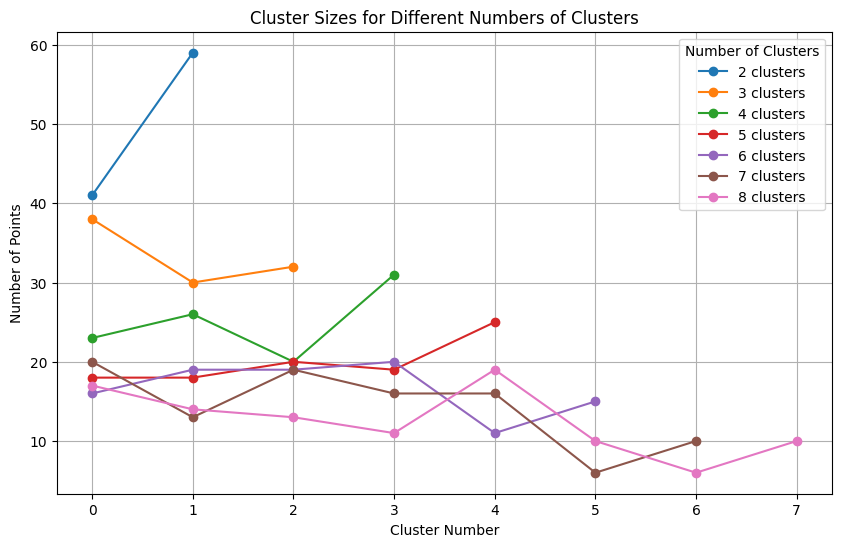

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming kmeans_models is a dictionary where keys are the number of clusters
# and values are the corresponding KMeans models
# For example: kmeans_models = {2: kmeans_2, 3: kmeans_3, ..., 8: kmeans_8}

# Extracting cluster counts and the number of points assigned to each cluster
cluster_counts = {}
for k, model in kmeans_models.items():
    labels = model.labels_
    counts = np.bincount(labels)
    cluster_counts[k] = counts

# Plotting the results
plt.figure(figsize=(10, 6))
for k, counts in cluster_counts.items():
    plt.plot(range(len(counts)), counts, marker='o', label=f'{k} clusters')

plt.xlabel('Cluster Number')
plt.ylabel('Number of Points')
plt.title('Cluster Sizes for Different Numbers of Clusters')
plt.legend(title='Number of Clusters')
plt.grid(True)
plt.show()

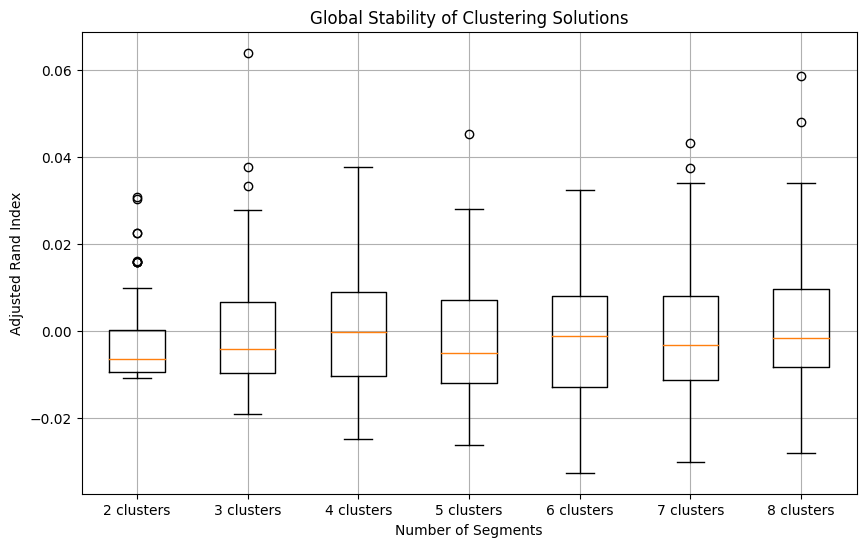

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample
from sklearn.cluster import KMeans

import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')
# Assuming MD_x is your data and you have a dictionary of KMeans models for different cluster numbers
# Example: kmeans_models = {2: kmeans_2, 3: kmeans_3, ..., 8: kmeans_8}

# Function to compute stability using bootstrapping
def compute_bootstrap_stability(X, kmeans_models, nboot=100):
    rand_indices = {k: [] for k in kmeans_models.keys()}

    for k, model in kmeans_models.items():
        labels = model.labels_

        for _ in range(nboot):
            X_bootstrap, labels_bootstrap = resample(X, replace=True, n_samples=len(X)), resample(labels, replace=True, n_samples=len(labels))
            kmeans_bootstrap = KMeans(n_clusters=k, random_state=1234)
            kmeans_bootstrap.fit(X_bootstrap)
            rand_index = adjusted_rand_score(labels_bootstrap, kmeans_bootstrap.labels_)
            rand_indices[k].append(rand_index)

    return rand_indices

# Example data and models
kmeans_models = {
    2: KMeans(n_clusters=2, random_state=1234).fit(MD_x),
    3: KMeans(n_clusters=3, random_state=1234).fit(MD_x),
    4: KMeans(n_clusters=4, random_state=1234).fit(MD_x),
    5: KMeans(n_clusters=5, random_state=1234).fit(MD_x),
    6: KMeans(n_clusters=6, random_state=1234).fit(MD_x),
    7: KMeans(n_clusters=7, random_state=1234).fit(MD_x),
    8: KMeans(n_clusters=8, random_state=1234).fit(MD_x)
}

# Compute stability
rand_indices = compute_bootstrap_stability(MD_x, kmeans_models, nboot=100)

# Plot the results
plt.figure(figsize=(10, 6))
for k, indices in rand_indices.items():
    plt.boxplot(indices, positions=[k], widths=0.5, labels=[f'{k} clusters'])

plt.xlabel('Number of Segments')
plt.ylabel('Adjusted Rand Index')
plt.title('Global Stability of Clustering Solutions')
plt.grid(True)
plt.show()

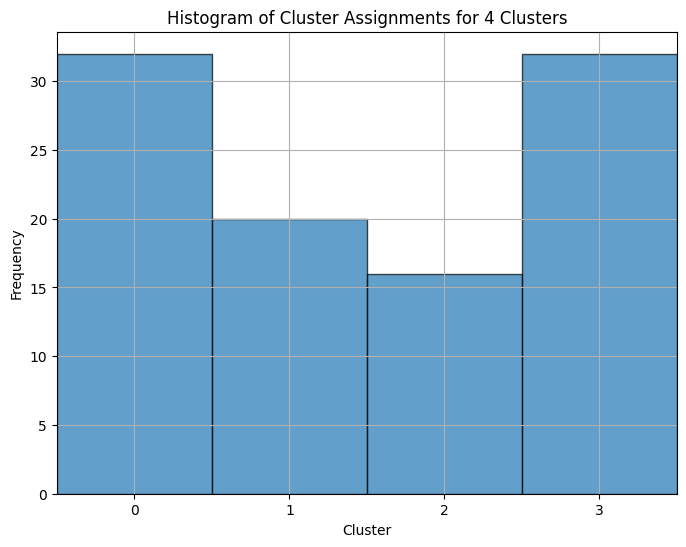

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming MD_x is your data and you've already fitted KMeans models for different cluster counts

# Fit KMeans with 4 clusters if not already done
kmeans_4 = KMeans(n_clusters=4, random_state=1234)
kmeans_4.fit(MD_x)

# Get cluster labels for the 4-cluster model
labels_4 = kmeans_4.labels_

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(labels_4, bins=np.arange(5) - 0.5, edgecolor='black', alpha=0.7)
plt.xlim(-0.5, 3.5)  # Adjust xlim to match 0:1 as in R code, if appropriate
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title('Histogram of Cluster Assignments for 4 Clusters')
plt.xticks(range(4))  # Adjust x-ticks to show cluster numbers
plt.grid(True)
plt.show()

In [26]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Assuming MD_x is your binary data and is loaded properly
# Define range of number of components (clusters) to test
cluster_range = range(2, 9)

# Dictionary to store GMM models
gmm_models = {}

# Fit GMM for each number of components
for n_components in cluster_range:
    gmm = GaussianMixture(n_components=n_components, random_state=1234)
    gmm.fit(MD_x)
    gmm_models[n_components] = gmm

# Example: Print out the model summary for k = 2 to 8
for n_components, model in gmm_models.items():
    print(f"Number of components (clusters): {n_components}")
    print(f"Converged: {model.converged_}")
    print(f"AIC: {model.aic(MD_x)}")
    print(f"BIC: {model.bic(MD_x)}")
    print()

# You can use silhouette score to evaluate the clustering
for n_components in cluster_range:
    gmm = gmm_models[n_components]
    labels = gmm.predict(MD_x)
    score = silhouette_score(MD_x, labels)
    print(f"Silhouette Score for {n_components} clusters: {score:.3f}")

Number of components (clusters): 2
Converged: True
AIC: 313.171379867431
BIC: 362.66961340120474

Number of components (clusters): 3
Converged: True
AIC: 172.45348121246982
BIC: 248.0034166061245

Number of components (clusters): 4
Converged: True
AIC: -135.92581310547794
BIC: -34.32417585194236

Number of components (clusters): 5
Converged: True
AIC: -501.4738447483942
BIC: -373.8205056349777

Number of components (clusters): 6
Converged: True
AIC: -813.2126042010656
BIC: -659.5075632277682

Number of components (clusters): 7
Converged: True
AIC: -1058.1320996131185
BIC: -878.3753567799401

Number of components (clusters): 8
Converged: True
AIC: -1046.5170944573747
BIC: -840.7086497643154

Silhouette Score for 2 clusters: 0.587
Silhouette Score for 3 clusters: 0.580
Silhouette Score for 4 clusters: 0.636
Silhouette Score for 5 clusters: 0.693
Silhouette Score for 6 clusters: 0.758
Silhouette Score for 7 clusters: 0.832
Silhouette Score for 8 clusters: 0.750


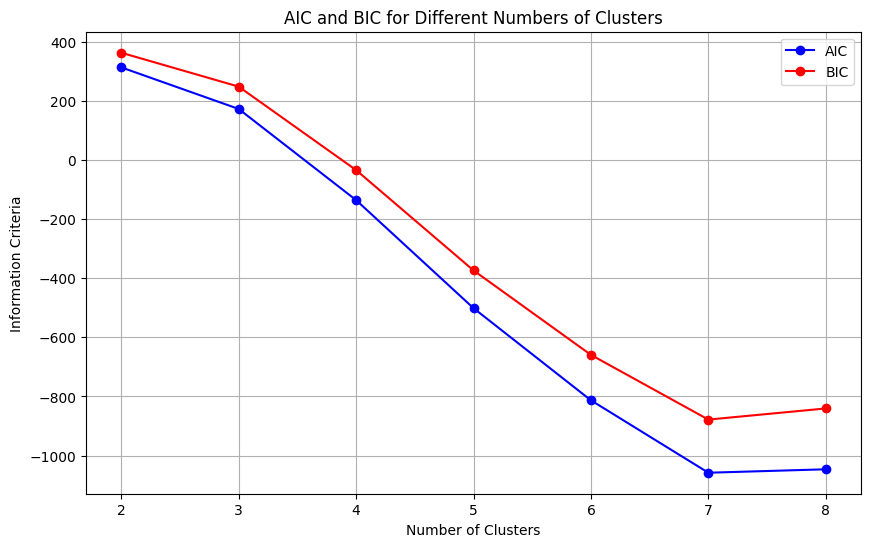

In [27]:
import matplotlib.pyplot as plt

# Assuming gmm_models dictionary contains GMM models from the previous step

# Initialize lists to store AIC and BIC values
aic_values = []
bic_values = []

# Calculate AIC and BIC for each model
for n_components, model in gmm_models.items():
    aic_values.append(model.aic(MD_x))
    bic_values.append(model.bic(MD_x))

# Plot AIC and BIC values
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, aic_values, marker='o', label='AIC', color='blue')
plt.plot(cluster_range, bic_values, marker='o', label='BIC', color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('Information Criteria')
plt.title('AIC and BIC for Different Numbers of Clusters')
plt.legend()
plt.grid(True)
plt.xticks(cluster_range)
plt.show()

In [28]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import LabelEncoder

# Assume MD_x is your data matrix (as a numpy array or pandas DataFrame)
# Example MD_x = np.random.randint(0, 2, size=(100, 11))  # Replace with actual data

# Define the number of clusters
n_clusters = 4

# Fit k-means model
kmeans_model = KMeans(n_clusters=n_clusters, random_state=1234)
kmeans_clusters = kmeans_model.fit_predict(MD_x)

# Fit Gaussian Mixture Model
gmm_model = GaussianMixture(n_components=n_clusters, random_state=1234)
gmm_clusters = gmm_model.fit_predict(MD_x)

# Create a contingency table
contingency_table = pd.crosstab(kmeans_clusters, gmm_clusters, rownames=['KMeans Cluster'], colnames=['GMM Cluster'])

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

# Optionally, compute and print a confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(kmeans_clusters, gmm_clusters)
print("Confusion Matrix:")
print(conf_matrix)

Contingency Table:
GMM Cluster      0   1   2   3
KMeans Cluster                
0               32   0   0   0
1                0  20   0   0
2                0   0  16   0
3                0   0   0  32
Confusion Matrix:
[[32  0  0  0]
 [ 0 20  0  0]
 [ 0  0 16  0]
 [ 0  0  0 32]]


In [29]:
# Compute the frequency table for the 'Like' column
like_counts = mcdonalds['Like'].value_counts()

# Reverse the order of the frequency counts
reversed_like_counts = like_counts.sort_index(ascending=False)

print(reversed_like_counts)

Like
I love it!+5    143
I hate it!-5    152
0               169
-4               71
-3               73
-2               59
-1               58
+4              160
+3              229
+2              187
+1              152
Name: count, dtype: int64


A.6 Step 6: **Profiling** **Segments**

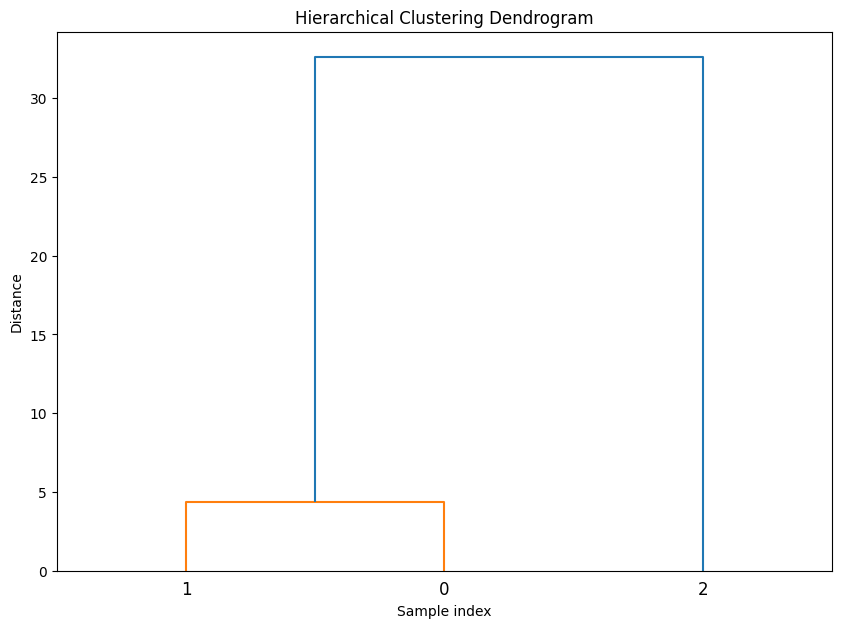

In [30]:

from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram


# Assuming MD_x is your DataFrame with the data
# Load your data accordingly, here MD_x is a placeholder

# Example: MD_x = pd.read_csv('path_to_your_file.csv').iloc[:, 0:11]  # Adjust column range

# Transpose the data
MD_x_transposed = MD_x.T

# Compute the distance matrix
dist_matrix = pdist(MD_x_transposed, metric='euclidean')

# Perform hierarchical clustering
linked = linkage(dist_matrix, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

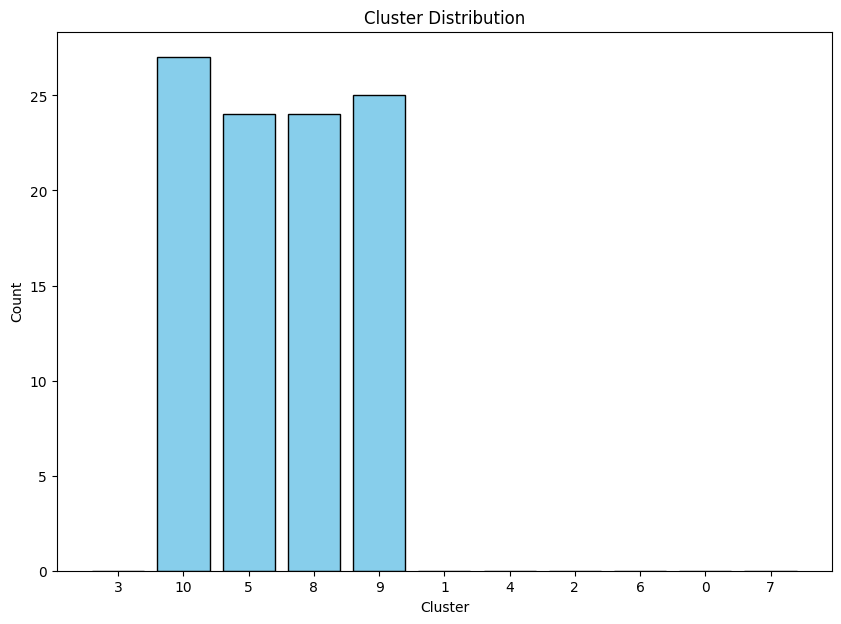

In [34]:

# Assuming you have MD_x as your DataFrame and MD_k4 is the result of KMeans clustering
# Here is an example setup for demonstration
# Example data
MD_x = pd.DataFrame(np.random.randint(0, 2, size=(100, 11)), columns=[f'Feature_{i}' for i in range(11)])
np.random.seed(1234)
MD_k4 = pd.Series(np.random.randint(1, 5, size=MD_x.shape[0]), name='Cluster')

# Hierarchical clustering results for ordering
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist

# Perform hierarchical clustering on the transposed data
MD_x_transposed = MD_x.T
dist_matrix = pdist(MD_x_transposed, metric='euclidean')
linked = linkage(dist_matrix, method='ward')
dendro = dendrogram(linked, no_plot=True)

# Get the order of clusters from hierarchical clustering
order = np.array(dendro['leaves'])

# Reorder the clusters according to hierarchical clustering results
cluster_counts = MD_k4.value_counts().reindex(order, fill_value=0)

# Create a bar chart
plt.figure(figsize=(10, 7))
bars = plt.bar(cluster_counts.index, cluster_counts.values, color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Cluster Distribution')
plt.xticks(ticks=np.arange(len(cluster_counts)), labels=cluster_counts.index)

# Optionally shade the bars
for bar in bars:
    bar.set_edgecolor('black')

plt.show()

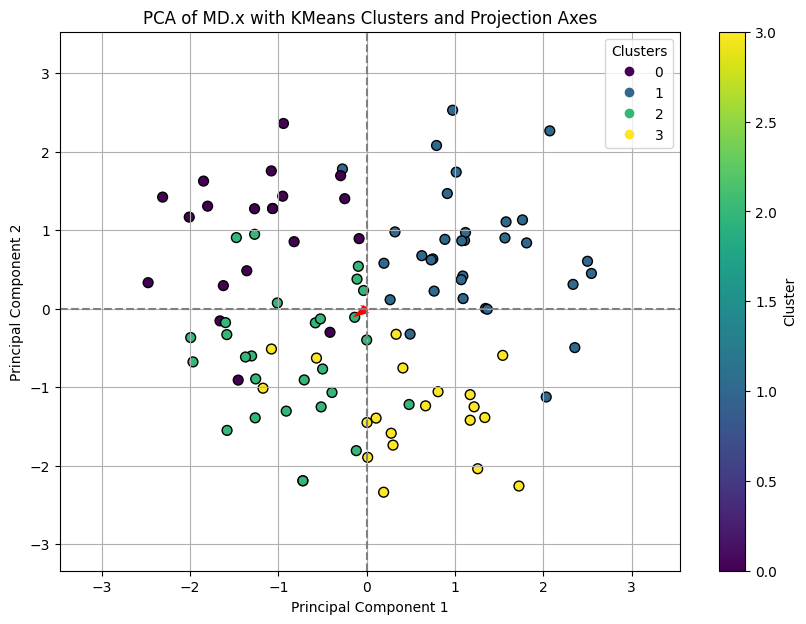

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Example data
np.random.seed(1234)
MD_x = pd.DataFrame(np.random.randint(0, 2, size=(100, 11)), columns=[f'Feature_{i}' for i in range(11)])
kmeans = KMeans(n_clusters=4, random_state=1234)
MD_k4 = kmeans.fit_predict(MD_x)

# Perform PCA
scaler = StandardScaler()
MD_x_scaled = scaler.fit_transform(MD_x)
pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD_x_scaled)

# Create DataFrame for PCA results
pca_df = pd.DataFrame(MD_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = MD_k4

# Plot PCA results with clusters and projection axes
plt.figure(figsize=(10, 7))

# Scatter plot with clusters
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of MD.x with KMeans Clusters and Projection Axes')

# Plot projection axes
for i, (component, value) in enumerate(zip(pca.components_, pca.explained_variance_ratio_)):
    plt.quiver(0, 0, component[0], component[1], angles='xy', scale_units='xy', scale=2, color='red', label=f'PC{i+1}')

# Create legend for clusters
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.colorbar(scatter, label='Cluster')

plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')

# Set limits for better visualization
plt.xlim(min(pca_df['PC1']) - 1, max(pca_df['PC1']) + 1)
plt.ylim(min(pca_df['PC2']) - 1, max(pca_df['PC2']) + 1)

plt.grid(True)
plt.show()

A.7 Step 7: **Describing** **Segments**

<Figure size 1000x700 with 0 Axes>

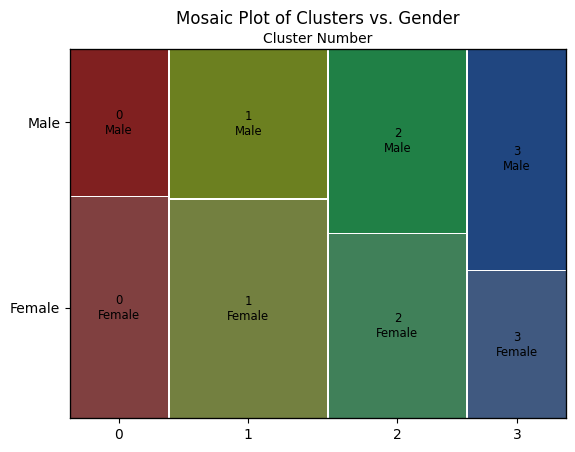

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

# Example data
np.random.seed(1234)
MD_x = pd.DataFrame(np.random.randint(0, 2, size=(100, 11)), columns=[f'Feature_{i}' for i in range(11)])
MD_x['Gender'] = np.random.choice(['Male', 'Female'], size=100)
k4 = KMeans(n_clusters=4, random_state=1234).fit_predict(MD_x.iloc[:, :-1])

# Create a contingency table
contingency_table = pd.crosstab(k4, MD_x['Gender'])

# Plot the mosaic plot without the 'shade' argument
plt.figure(figsize=(10, 7))
mosaic(contingency_table.stack(), title='Mosaic Plot of Clusters vs. Gender')
plt.xlabel('Cluster Number')
plt.ylabel('Gender')
plt.show()

A.8 **Step** 8: **Selecting** (**the**) **Target** **Segment**(**s**)**bold text**

In [6]:
print(MD_x.columns)

Index(['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3', 'Feature_4',
       'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9',
       'Feature_10', 'Gender'],
      dtype='object')
